In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df = pd.read_csv('./Advertising.csv')

In [186]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [188]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [189]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()

    return percent_nan

In [190]:
percent_missing(df)

Series([], dtype: float64)

In [191]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Data Visualization

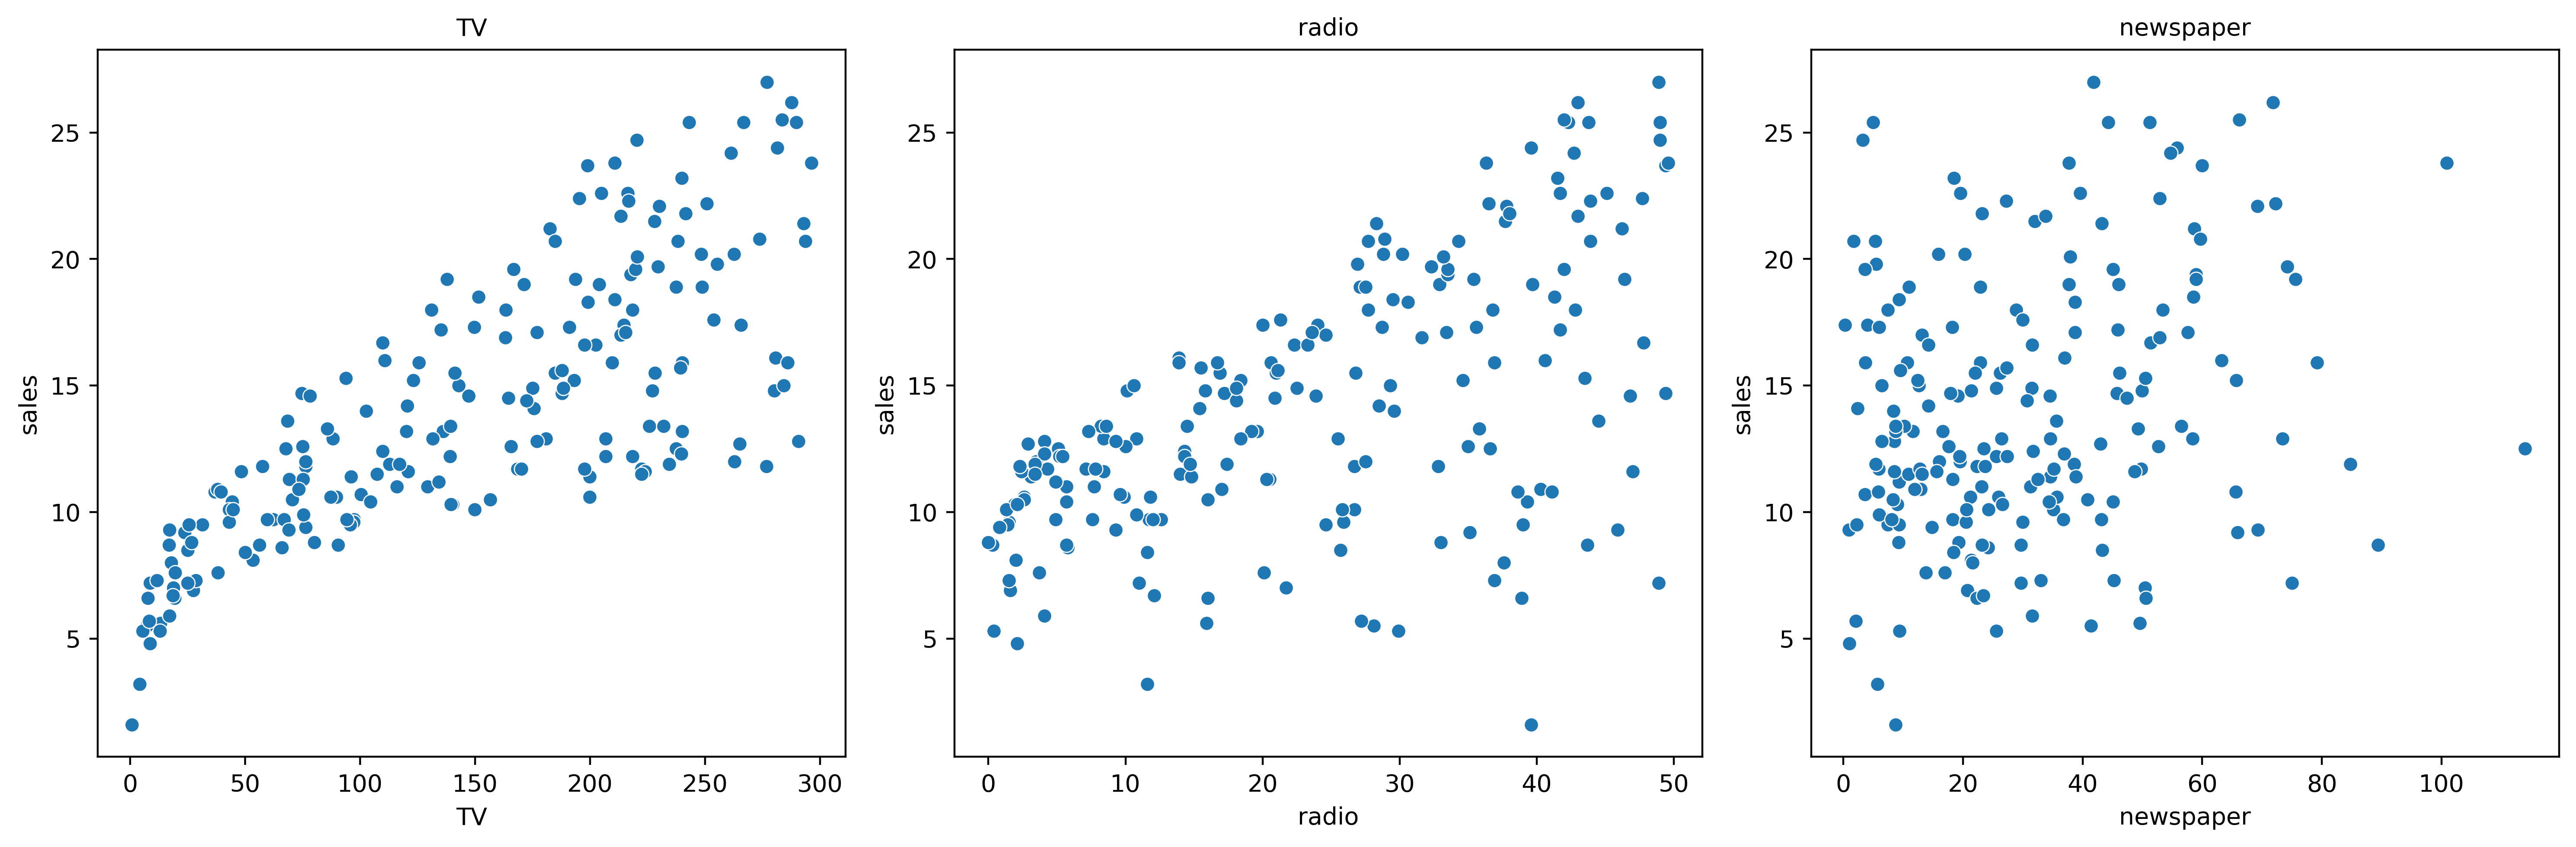

In [192]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=400)
for i,col in enumerate(df.columns):
    if i >= 3:
        break
    col_index = i
    sns.scatterplot(x=col,y='sales', data=df, ax=axes[col_index])
    axes[col_index].set_title(col, fontsize=10)
plt.tight_layout()

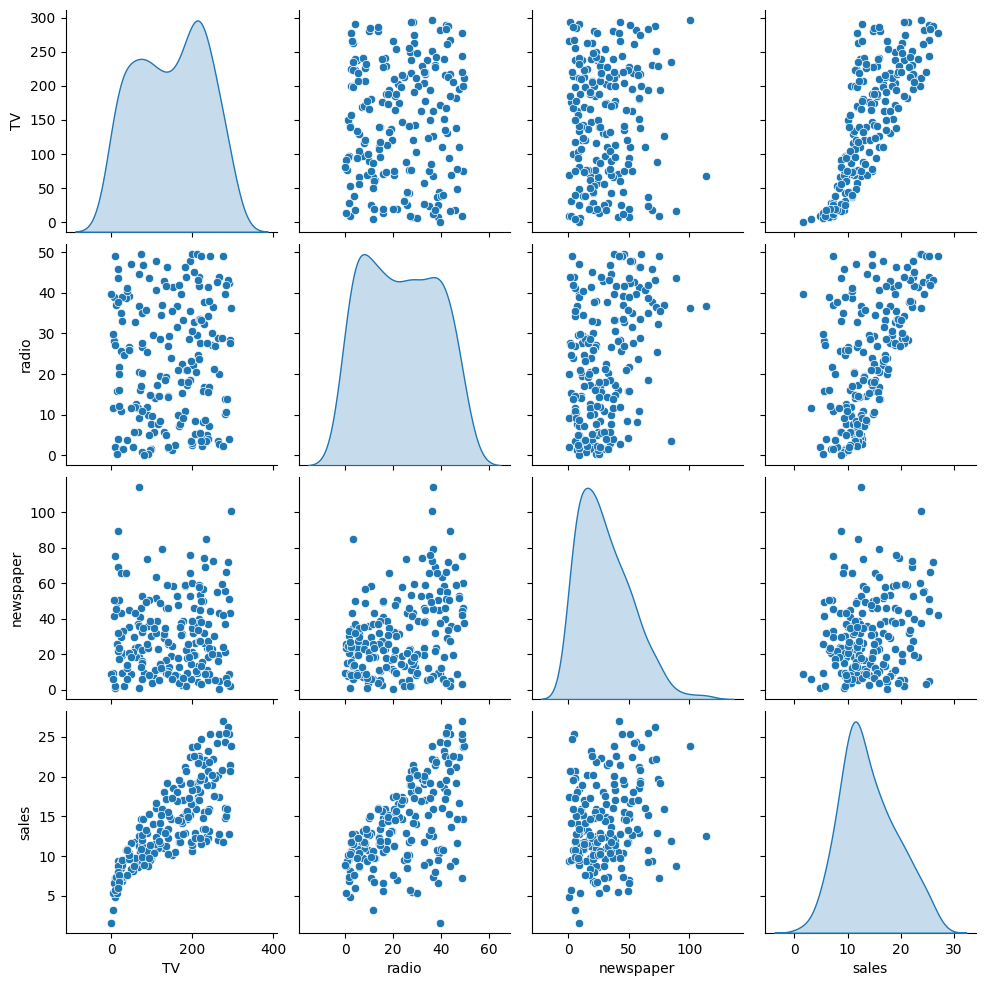

In [193]:
sns.pairplot(data=df,diag_kind='kde')

In [194]:
X = df.drop('sales', axis=1)
y = df['sales']

### Splitting the Data 

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Scaling the Data

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
scaler = StandardScaler()

In [198]:
scaler.fit(X_train)

StandardScaler()

In [199]:
X_train

,TV,radio,newspaper
1,44.5,39.3,45.1
43,206.9,8.4,26.4
102,280.2,10.1,21.4
164,117.2,14.7,5.4
9,199.8,2.6,21.2
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [200]:
X_train = scaler.transform(X_train)

In [201]:
pd.DataFrame(X_train)

,0,1,2
0,-1.263835,1.088833,0.702021
1,0.641621,-1.011176,-0.176131
2,1.501657,-0.895641,-0.410931
3,-0.410838,-0.583019,-1.162291
4,0.558316,-1.405352,-0.420323
...,...,...,...
145,-0.580968,0.429607,-1.021411
146,0.550102,0.497568,0.401477
147,1.027640,-1.303410,0.316949
148,0.733139,0.049023,-1.228035


In [202]:
X_test = scaler.transform(X_test)

### Building Model

In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
linear_regg_model = LinearRegression()

In [205]:
linear_regg_model.fit(X_train, y_train)

LinearRegression()

In [206]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
def report_model(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    print(f'the mean absolute percentage error of the {model} is {mean_absolute_percentage_error(model_pred, y_test)}')
    print(f'the mean absolute error of the {model} is {mean_absolute_error(model_pred, y_test)}')
    print(f'the mean squared error of the {model} is { np.sqrt(mean_squared_error(model_pred, y_test))}')

In [207]:
report_model(linear_regg_model)

the mean absolute percentage error of the LinearRegression() is 0.09984396112713072
the mean absolute error of the LinearRegression() is 1.1385860673647978
the mean squared error of the LinearRegression() is 1.4521047337632076


### Residual Analysis

Residuals is defined as residuals(e) = y_hat - y_prediction

Assumption of e:

     - Expected value of residuals is equal to 0
     - The variance of residuals is equal for all the values of x
     - The residuals values are independent.
     - The residuals have a normal distribution.

In [208]:
model_prediction = linear_regg_model.predict(X_test)

In [209]:
residuals = model_prediction - y_test

In [210]:
np.mean(residuals)

-0.07352223196359181

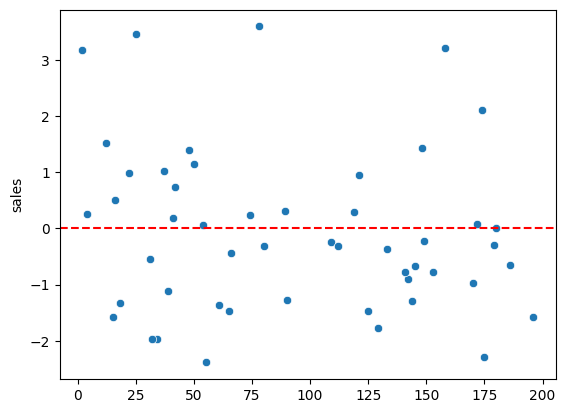

In [211]:
sns.scatterplot(residuals)
plt.axhline(y=0 ,color='r', ls='--')

<Axes: xlabel='sales', ylabel='Density'>

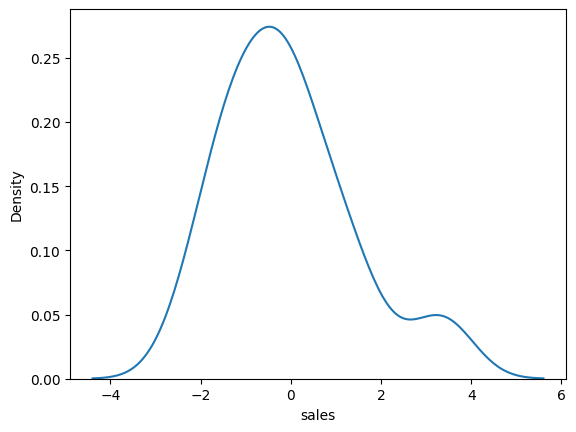

In [212]:
sns.kdeplot(residuals)

In [213]:
def residual_plot(model):
    plt.figure(figsize=(10,5))
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    plt.plot(np.arange(len(y_test)), y_test, marker='o', color='blue', label='Actual Values')
    plt.plot(np.arange(len(model_pred)), model_pred, marker='x', color='red', label='Predicted Values')
    plt.xlabel('Actual vs Predicted Values')
    plt.title('Actual vs. Predicted Values for Linear Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

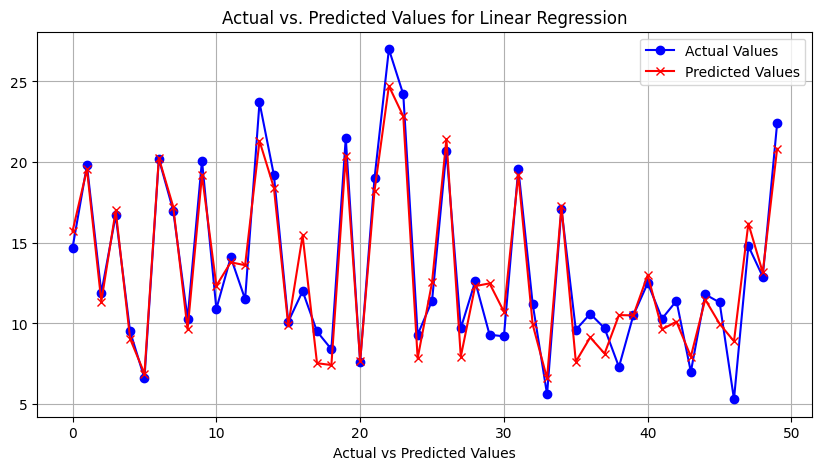

In [214]:
residual_plot(linear_regg_model)

### Model Performance

In [ ]:
report_model(linear_regg_model)

the mean absolute percentage error of the LinearRegression() is 0.09984396112713072
the mean absolute error of the LinearRegression() is 1.1385860673647978
the mean squared error of the LinearRegression() is 1.4521047337632076


In [ ]:
linear_regg_model.coef_

array([3.83131369, 2.79812674, 0.00583472])

In [220]:
from sklearn.metrics import r2_score

In [221]:
r2_score(y_test, model_prediction)

0.9246764680774092